
*   Mochamad Permana Ash Shidiq
*   1103228233
*   XGBoots Melb Data CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Dataset/7 Melb Data.csv'
data = pd.read_csv(file_path)

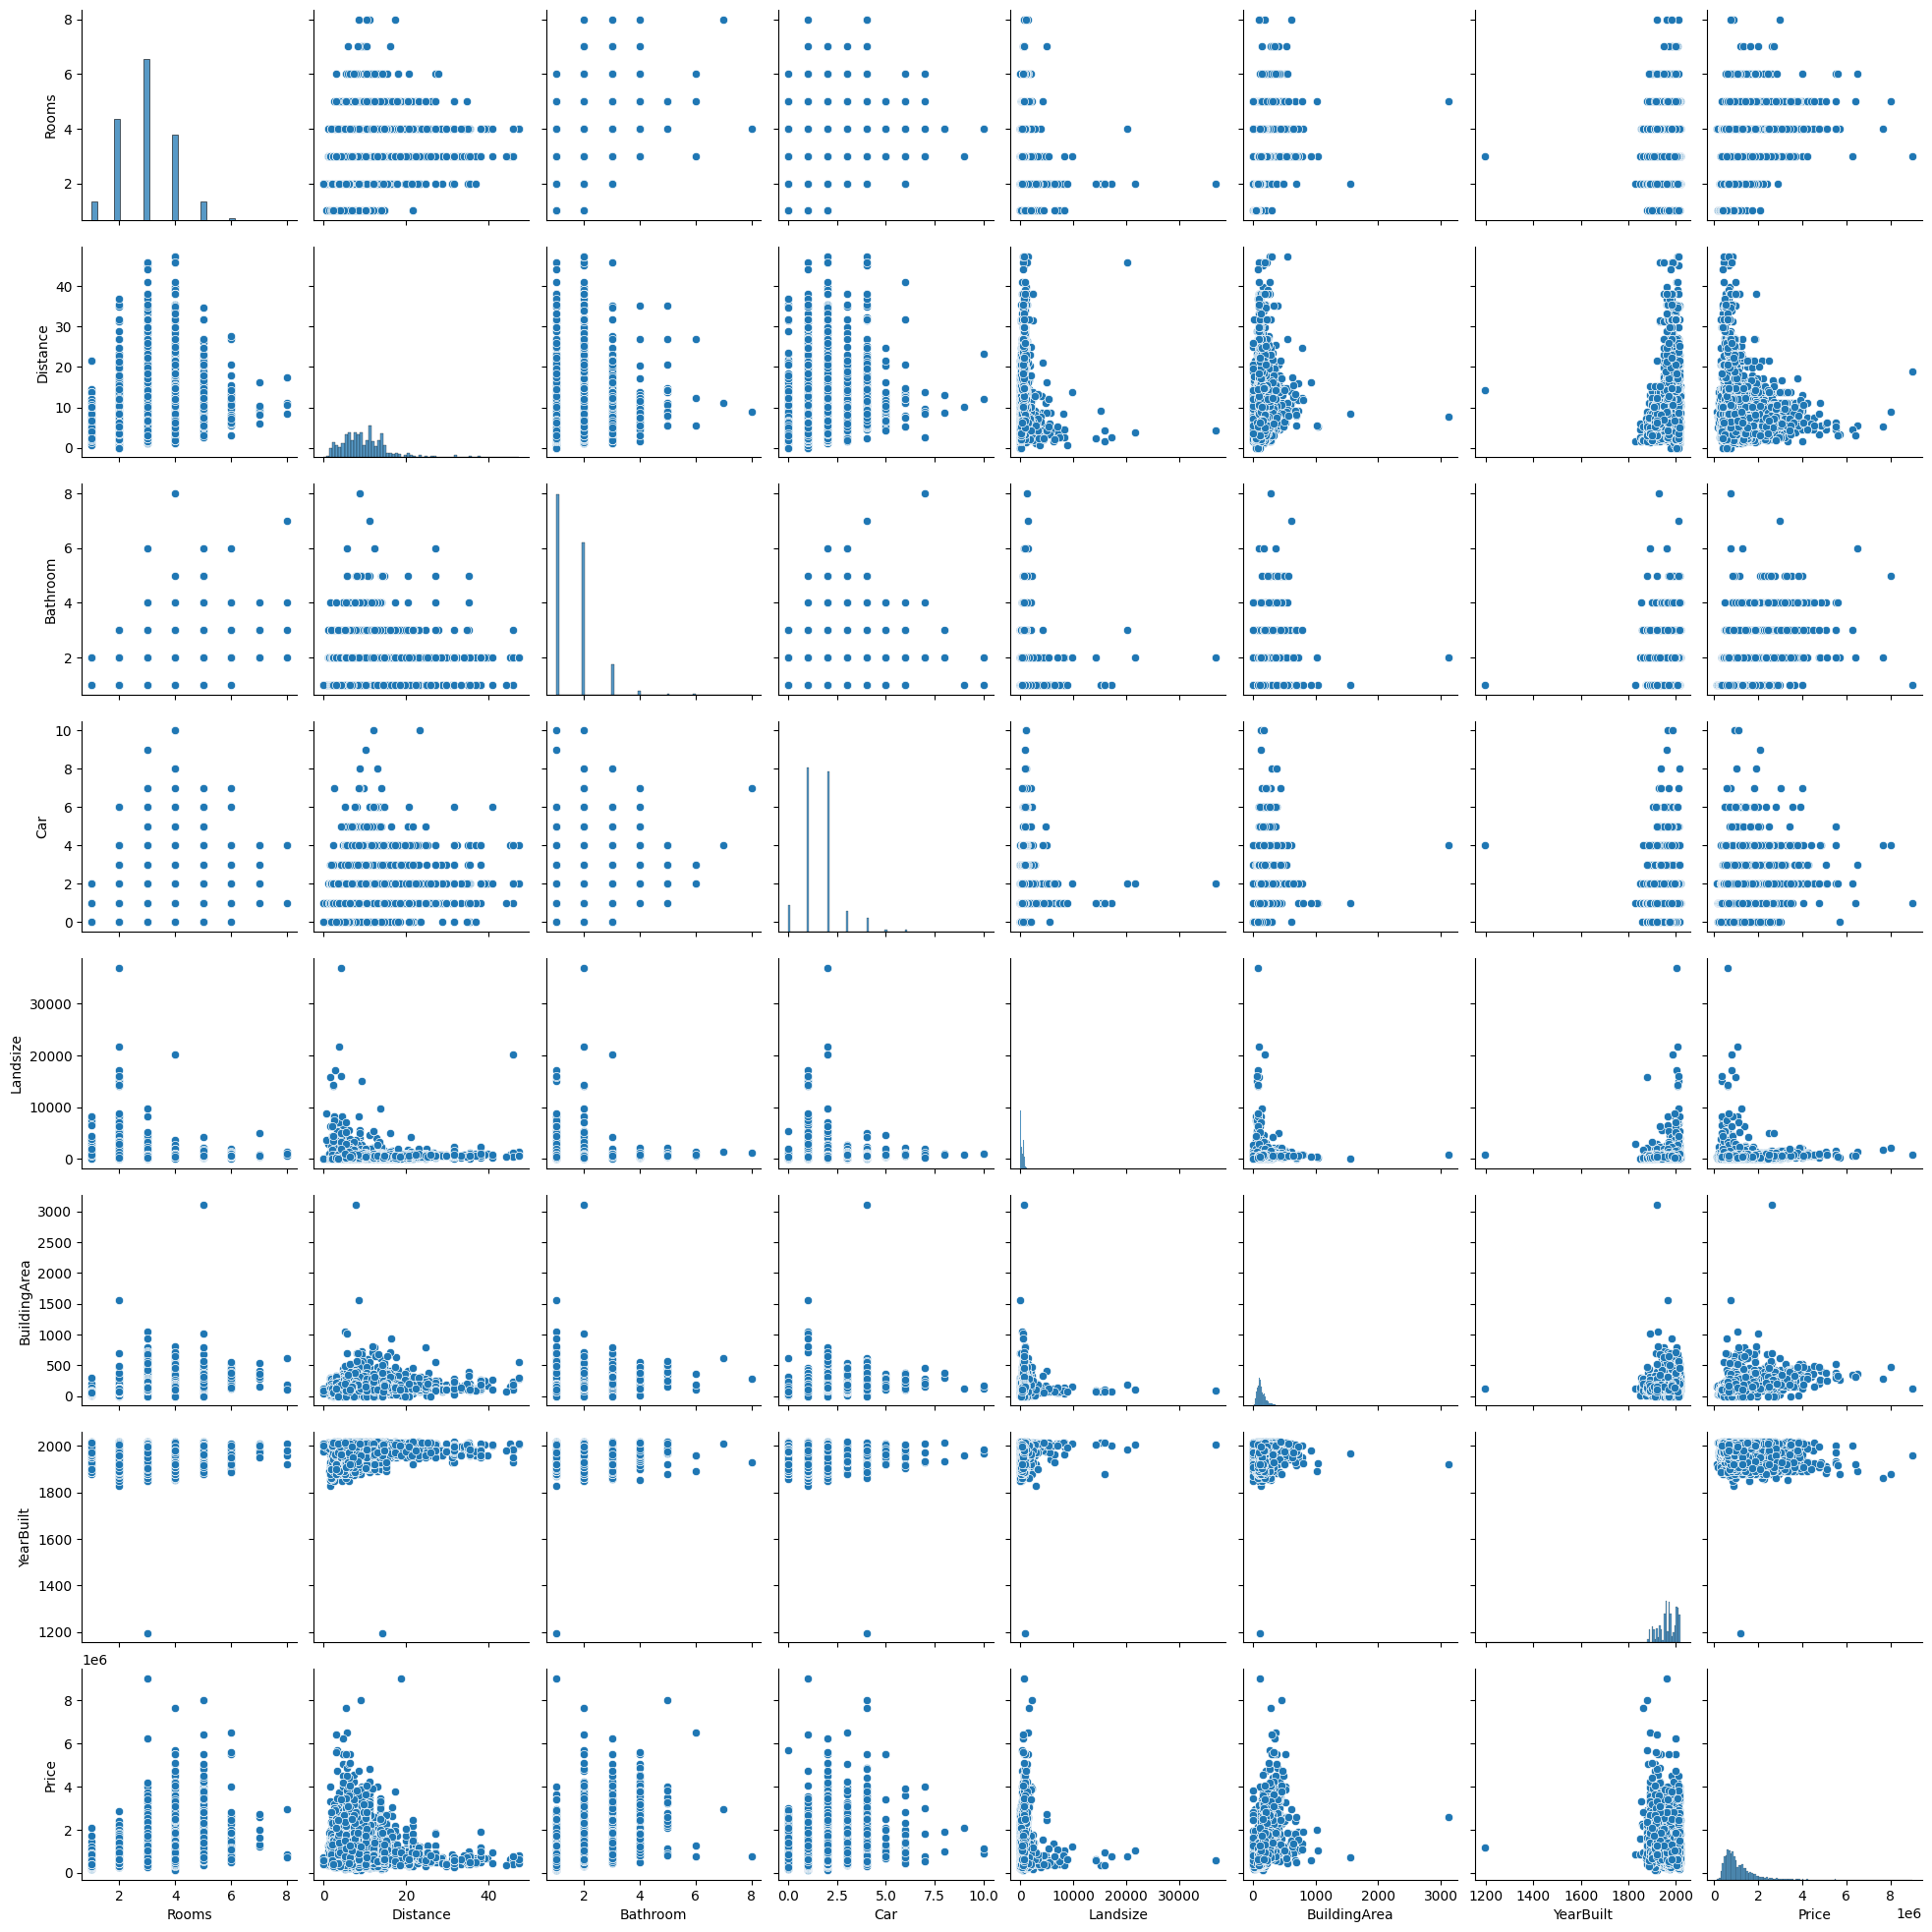

In [10]:
sns.pairplot(data)
plt.show()

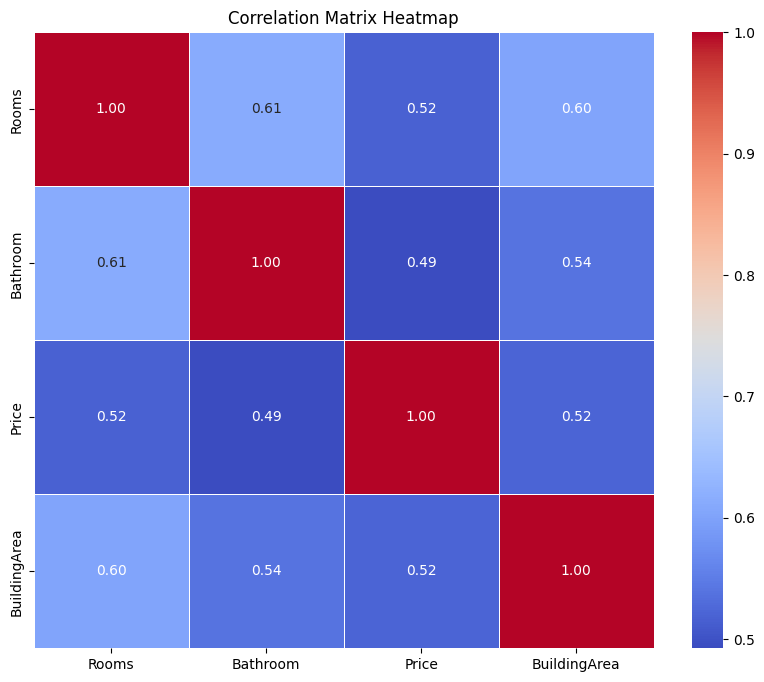

In [19]:
numeric_data = data.select_dtypes(include=[np.number])

corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
selected_columns = ['Rooms', 'Bathroom', 'Price', 'BuildingArea']
data = data[selected_columns].dropna()

In [16]:
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
rf_model = RandomForestRegressor(random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

models = {'Random Forest': rf_model, 'Decision Tree': dt_model, 'XGBoost': xgb_model}

for name, model in models.items():
  model.fit(X_train, y_train)

In [18]:
mae_scores = {}
for name, model in models.items():
  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  mae_scores[name] = mae

print("MAE Scores:")
for name, score in mae_scores.items():
  print(f"{name}: {score}")

MAE Scores:
Random Forest: 370021.2637998416
Decision Tree: 399697.7533527675
XGBoost: 357460.10505887016
